In [3]:
#Import Basic Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

# Import different Machine learning algorithm Libraries
import sklearn #Scikit-learn package for ML
from sklearn import svm #Support Vector Machine
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
import xgboost as xgb #XG Boost 

# Import different sub packages for ML
from sklearn import ensemble
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore") #Ignore Warning Messages

In [4]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [5]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')

Mounted at /content/drive


In [6]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.shape

(891, 12)

Анализируем данные

In [12]:
unique = df.nunique()  
missing = df.isnull().sum() 
dtypes = df.dtypes  

unq_mis = {'Data_types': dtypes, 'Unique_frequency': unique, 'Missing_count': missing}
unq_mis_data = pd.concat(unq_mis, axis=1)
unq_mis_data = unq_mis_data.reset_index(level=0)
unq_mis_data.columns = ['Column_name', 'Data_types', 'Unique_frequency', 'Missing_count']

unq_mis_data

,Column_name,Data_types,Unique_frequency,Missing_count
0,PassengerId,int64,891,0
1,Survived,int64,2,0
2,Pclass,int64,3,0
3,Name,object,891,0
4,Sex,object,2,0
5,Age,float64,88,177
6,SibSp,int64,7,0
7,Parch,int64,7,0
8,Ticket,object,681,0
9,Fare,float64,248,0


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


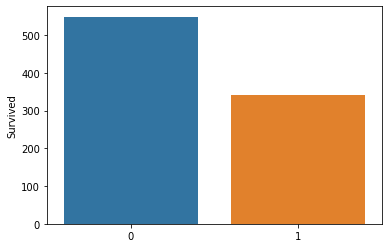

In [14]:
survive = df['Survived'].value_counts()
print(survive)
sns.barplot(survive.index, survive)

**Удаляем PassengerId column**

In [33]:
df = df.drop(['PassengerId'], axis=1)

In [34]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S


**Заполняем пропущенные значения**

In [35]:
df['Age'] =  df['Age'].fillna(df['Age'].median())
df['Embarked'] =  df['Embarked'].fillna(df['Embarked'].mode())
df['Fare'] =  df['Fare'].fillna(df['Fare'].mean())

In [37]:
df = df.drop(['Cabin'], axis=1)

In [39]:
df = df.drop(['Name'], axis=1)
df = df.drop(['Ticket'], axis=1)

**Смотрим корреляцию между признаками**

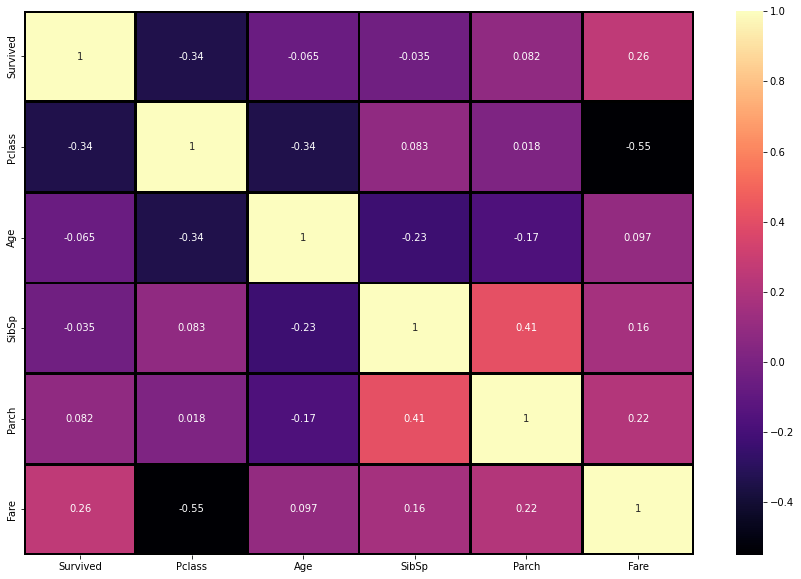

In [40]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(),cmap='magma',linewidths=2,linecolor='black',annot=True)

In [41]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
845,0,3,male,42.0,0,0,7.55,S
611,0,3,male,28.0,0,0,7.05,S


**Преобразуем некатегориальные признаки sklearn.preprocessing.StandardScaler**

In [69]:
#Spliting Categorical and Numerical Variable of train dataset
df_cat = df[['Survived','Pclass', 'Sex', 'Embarked']]
df_num =df[['Age', 'SibSp', 'Parch', 'Fare']]
df_col = ['Age', 'SibSp', 'Parch', 'Fare']

In [70]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)
df_num = pd.DataFrame(df_num)
df_num.columns = df_col

In [84]:
df_final = df_num.join(df_cat) #joining numerical data after scaling with categorical data

In [85]:
df_final.head(2)

,Age,SibSp,Parch,Fare,Survived,Pclass,Sex,Embarked
0,0.971260,-0.474545,-0.473674,-0.496405,0,3,male,S
1,-0.104637,-0.474545,-0.473674,-0.506472,1,1,female,C


**Преобразуем категориальные признаки с помощью sklearn.preprocessing.OneHotEncoder**

In [86]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_final[['Sex']])

def get_ohe(df_f):
    temp_df = pd.DataFrame(data=ohe.transform(df_f[['Sex']]), columns=ohe.get_feature_names_out())
    df_f.drop(columns=['Sex'], axis=1, inplace=True)
    df_f = pd.concat([df_f.reset_index(drop=True), temp_df], axis=1)
    return df_f

df_final = get_ohe(df_final)

In [87]:
ohe.fit(df_final[['Embarked']])
def get_ohe(df_f):
    temp_df = pd.DataFrame(data=ohe.transform(df_f[['Embarked']]), columns=ohe.get_feature_names_out())
    df_f.drop(columns=['Embarked'], axis=1, inplace=True)
    df_f = pd.concat([df_f.reset_index(drop=True), temp_df], axis=1)
    return df_f
df_final = get_ohe(df_final)

In [88]:
df_final = df_final.drop(['Sex_female', 'Embarked_C'], axis=1)


In [89]:
df_final.head(1)

,Age,SibSp,Parch,Fare,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,0.97126,-0.474545,-0.473674,-0.496405,0,3,1.0,0.0,1.0,0.0


**Делим на трейн и тест**

In [90]:
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**KNN Алгоритм**

In [92]:
# KNN for classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
prediction_1 = model.predict(X_test)

KNN accuracy: 70.39106145251397%
Confusion Matrix of KNN =


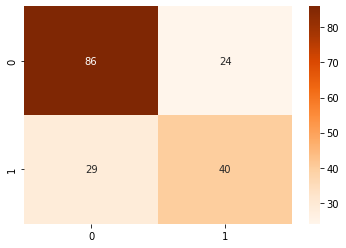

In [95]:
from sklearn import metrics
KNN_accr = accuracy_score(y_test, prediction_1)*100

print('KNN accuracy: {}%'.format(KNN_accr))

# Confusion matrix
print('Confusion Matrix of KNN =')
sns.heatmap(confusion_matrix(y_test, prediction_1), annot=True,cmap='Oranges',fmt='g')

In [96]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, prediction_1, average='macro')

(0.6864130434782609, 0.680764163372859, 0.6829741019214703, None)

In [97]:
precision_recall_fscore_support(y_test, prediction_1, average='micro')

(0.7039106145251397, 0.7039106145251397, 0.7039106145251397, None)

In [98]:
precision_recall_fscore_support(y_test, prediction_1, average='weighted')

(0.700479718241438, 0.7039106145251397, 0.7016349066334364, None)

In [100]:
precision_recall_fscore_support(y_test, prediction_1)

(array([0.74782609, 0.625     ]),
 array([0.78181818, 0.57971014]),
 array([0.76444444, 0.60150376]),
 array([110,  69]))

**Подберём гиперпараметры для обоих моделей с помощью RandomizedSearchCV**

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [105]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [106]:
model2 = KNeighborsClassifier()

In [107]:
randm_src = RandomizedSearchCV(estimator=model2, param_distributions = hyperparameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(leaf_size=6, n_neighbors=17, p=1)

 The best score across ALL searched params:
 0.7893258426966292

 The best parameters across ALL searched params:
 {'p': 1, 'n_neighbors': 17, 'leaf_size': 6}


KNN accuracy: 78.77094972067039%
Confusion Matrix of KNN =


(0.8125854993160054, 0.7408432147562583, 0.7531213704994193, None)

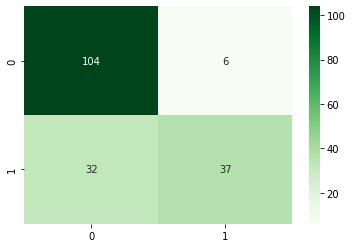

In [109]:
# KNN for classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(leaf_size=6, n_neighbors=17, p=1)
model.fit(X_train, y_train)
prediction_1 = model.predict(X_test)

KNN_accr = accuracy_score(y_test, prediction_1)*100

print('KNN accuracy: {}%'.format(KNN_accr))

# Confusion matrix
print('Confusion Matrix of KNN =')
sns.heatmap(confusion_matrix(y_test, prediction_1), annot=True,cmap='Greens',fmt='g')

precision_recall_fscore_support(y_test, prediction_1, average='macro')

**Лучшее решение было с использованием RandomizedSearchCV, который подобрал наилучшие гиперпараметры для KNN (leaf_size=6, n_neighbors=17, p=1). Пересчитав модель с этими гиперпараметрами получилось Accuracy 0,78, Precission = 0,81, Recall = 0,74, F2 = 0,75**